In [2]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib import rc

import seaborn as sb
from pylab import rcParams
import unittest

%matplotlib inline

sb.set(style='whitegrid', palette='muted', font_scale=1.5)

rcParams['figure.figsize'] = 14, 8

RANDOM_SEED = 42

np.random.seed(RANDOM_SEED)

def run_tests():
  unittest.main(argv=[''], verbosity=1, exit=False)

import warnings
warnings.filterwarnings('ignore')

In [112]:
train=pd.read_csv('train.csv')

In [113]:
#check the numbers of samples and features
print("Shape of train dataset before dropping Id column is : {}  ".format(train.shape))

Shape of train dataset before dropping Id column is : (1460, 81)  


In [92]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [93]:
train.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


In [118]:
train.set_index(train['Id'])
train.drop('Id', axis=1, inplace=True)
train['TotalSF'] = train['TotalBsmtSF'] + train['1stFlrSF'] + train['2ndFlrSF']
train.drop(['TotalBsmtSF','1stFlrSF','2ndFlrSF'],axis=1,inplace=True)
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 78 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

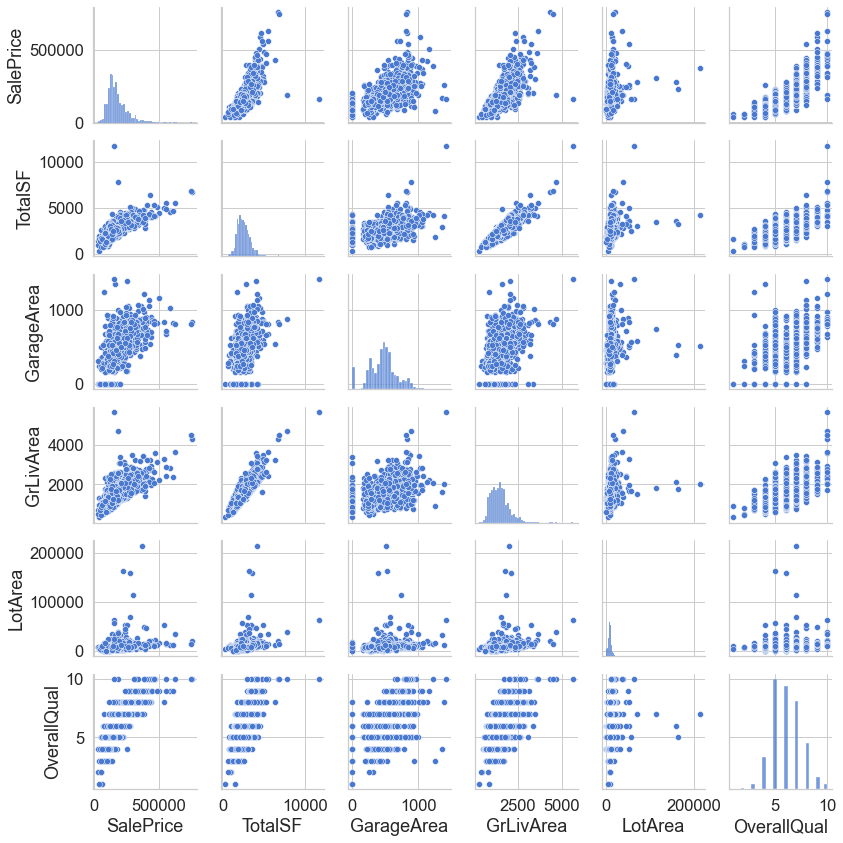

In [119]:
sb.pairplot(data=train[['SalePrice',
                         'TotalSF',
                         'GarageArea',
                         'GrLivArea',
                         'LotArea',
                         'OverallQual']], height=2)

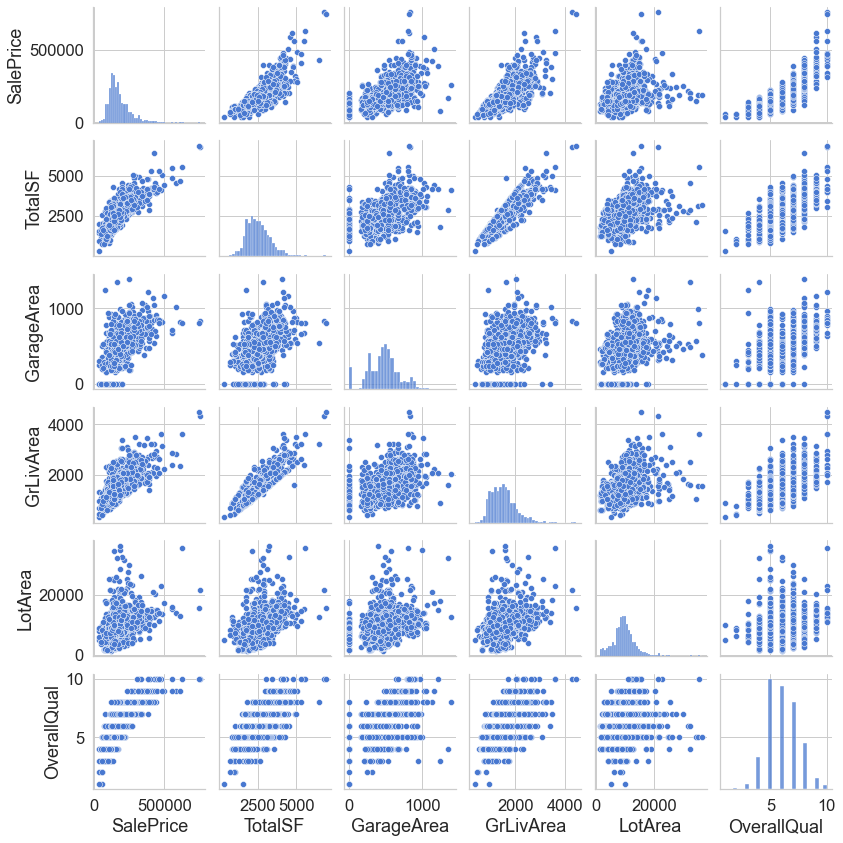

In [120]:
train.drop(train.index[train.TotalSF>7500],axis=0, inplace=True)
train.drop(train.index[train.LotArea>39000],axis=0, inplace=True)

sb.pairplot(data=train[['SalePrice',
                         'TotalSF',
                         'GarageArea',
                         'GrLivArea',
                         'LotArea',
                         'OverallQual']], height=2)

In [121]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
MSSubClass,1445.0,56.982699,42.295987,20.0,20.0,50.0,70.0,190.0
LotFrontage,1192.0,69.765101,23.138183,21.0,59.0,69.0,80.0,313.0
LotArea,1445.0,9776.588927,4238.856255,1300.0,7500.0,9430.0,11475.0,36500.0
OverallQual,1445.0,6.089965,1.376068,1.0,5.0,6.0,7.0,10.0
OverallCond,1445.0,5.573702,1.113814,1.0,5.0,5.0,6.0,9.0
YearBuilt,1445.0,1971.258131,30.244144,1872.0,1954.0,1973.0,2000.0,2010.0
YearRemodAdd,1445.0,1984.804152,20.662999,1950.0,1967.0,1994.0,2004.0,2010.0
MasVnrArea,1437.0,102.323591,178.847900,0.0,0.0,0.0,164.0,1600.0
BsmtFinSF1,1445.0,434.247059,429.520738,0.0,0.0,379.0,704.0,2188.0
BsmtFinSF2,1445.0,45.271972,158.339134,0.0,0.0,0.0,0.0,1474.0


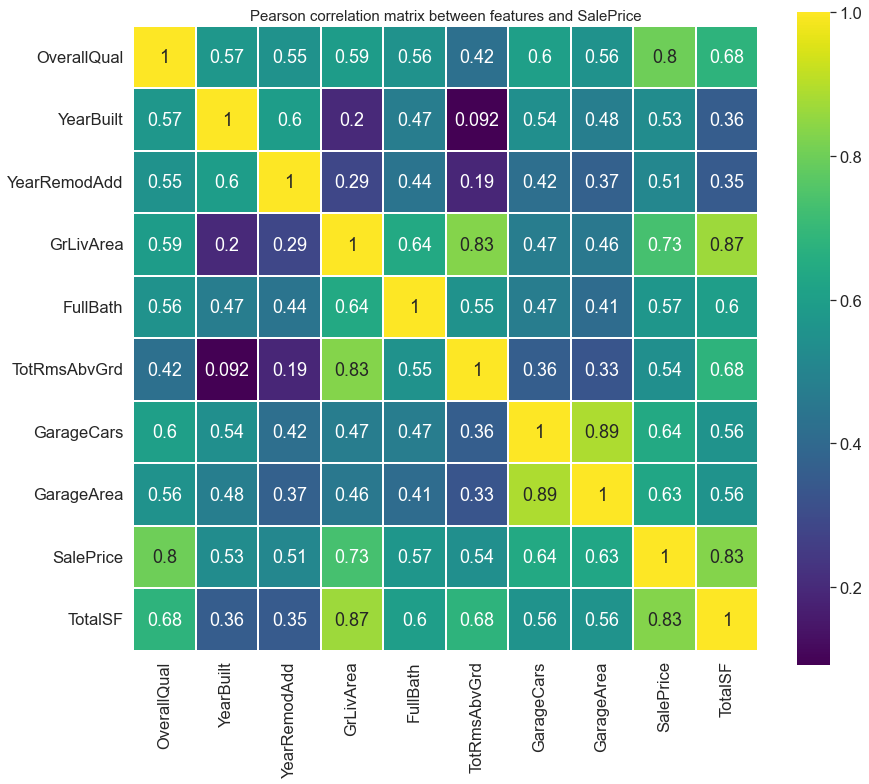

In [122]:
corr_train = train.corr()
highest_corr_features = corr_train.index[abs(corr_train['SalePrice']) > 0.5]

plt.figure(figsize=(14,12))
plt.title('Pearson correlation matrix between features and SalePrice', y=1, size=15)
sb.heatmap(train[highest_corr_features].corr(),
            linewidths=0.1,
            vmax=1.0, 
            square=True,
            cmap='viridis',
            linecolor='white',
            annot=True)
plt.show()

In [123]:
train['SalePrice'].describe()

count      1445.000000
mean     179844.114879
std       78495.845933
min       34900.000000
25%      129900.000000
50%      162000.000000
75%      213000.000000
max      755000.000000
Name: SalePrice, dtype: float64

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

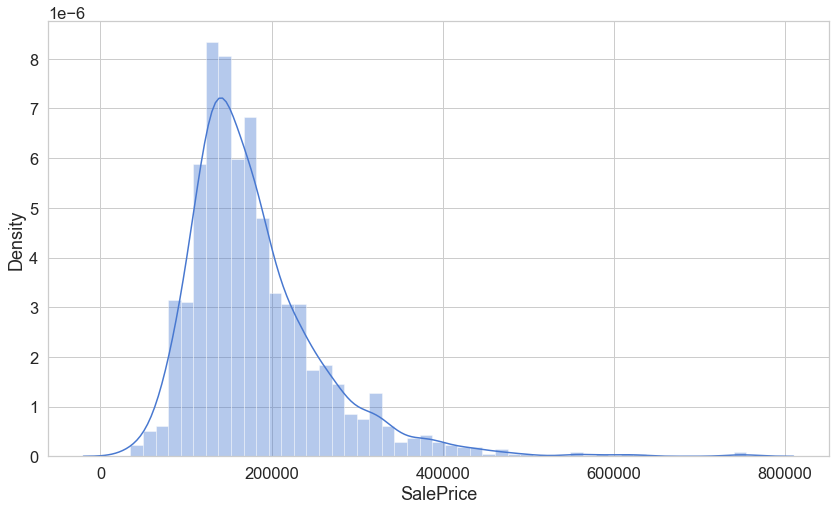

In [104]:
sb.distplot(train['SalePrice'])

In [124]:
#skewness and kurtosis
print("Skewness: %f" % train['SalePrice'].skew())
print("Kurtosis: %f" % train['SalePrice'].kurt())

Skewness: 1.903047
Kurtosis: 6.805026


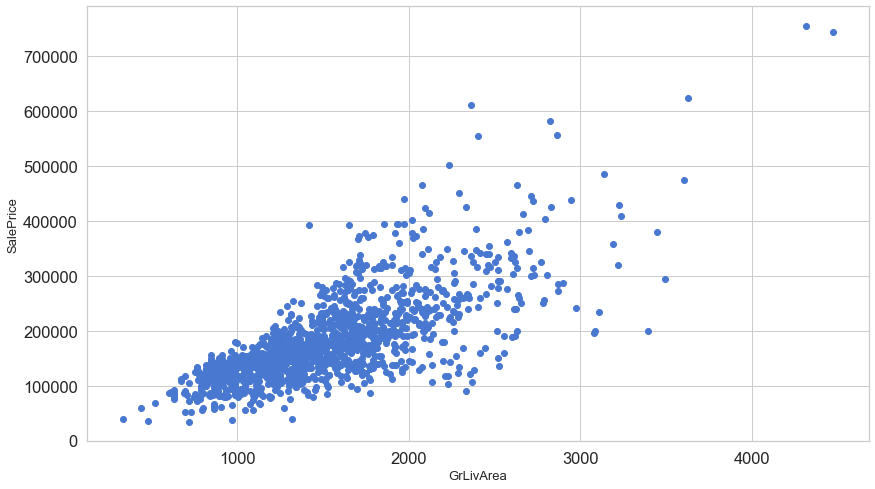

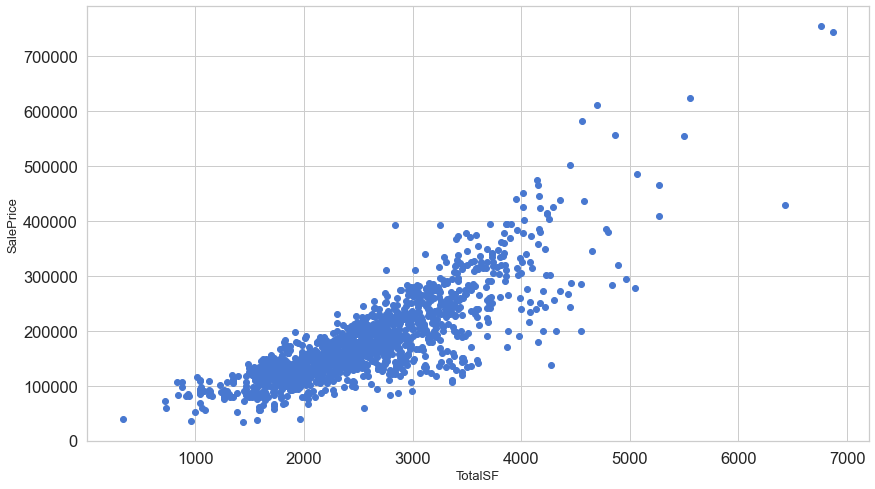

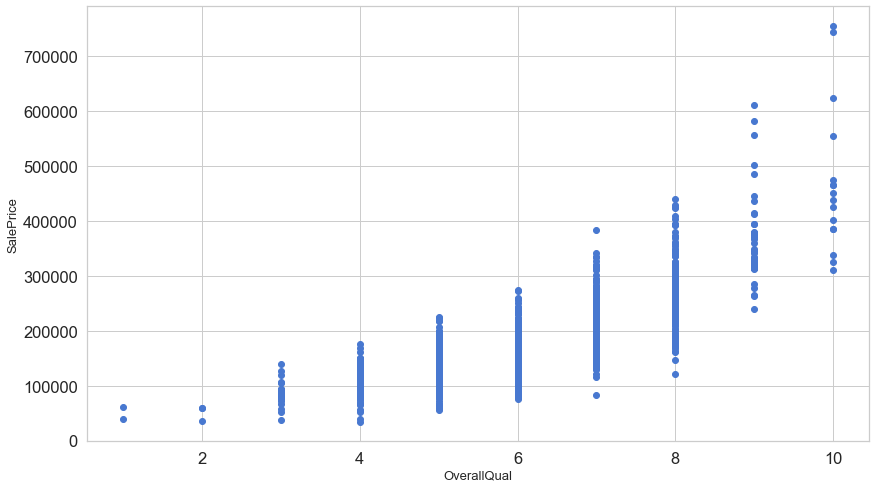

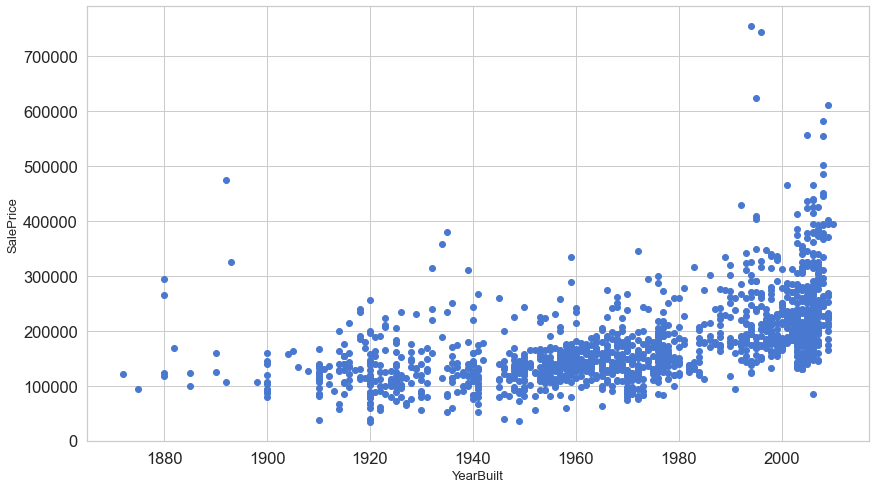

In [127]:
cols=['GrLivArea','TotalSF','OverallQual','YearBuilt']
for i in cols:
    fig, ax = plt.subplots()
    ax.scatter(x = train[i], y = train['SalePrice'])
    plt.ylabel('SalePrice', fontsize=13)
    plt.xlabel(i, fontsize=13)
    plt.show()

In [128]:
pd.DataFrame(train.isna().sum())

,0
MSSubClass,0
MSZoning,0
LotFrontage,253
LotArea,0
Street,0
...,...
YrSold,0
SaleType,0
SaleCondition,0
SalePrice,0


In [129]:
pd.isnull(train).sum()[pd.isnull(train).sum() > 0]

LotFrontage      253
Alley           1354
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1439
Fence           1164
MiscFeature     1393
dtype: int64

In [130]:
nan_cols = [i for i in train.columns if train[i].isna().sum() > 0.5*len(train)]
nan_cols

['Alley', 'PoolQC', 'Fence', 'MiscFeature']

In [131]:
train=train.drop(['Alley','PoolQC','Fence', 'MiscFeature'],axis='columns')

In [132]:
pd.isnull(train).sum()[pd.isnull(train).sum() > 0]

LotFrontage     253
MasVnrType        8
MasVnrArea        8
BsmtQual         37
BsmtCond         37
BsmtExposure     38
BsmtFinType1     37
BsmtFinType2     38
Electrical        1
FireplaceQu     690
GarageType       81
GarageYrBlt      81
GarageFinish     81
GarageQual       81
GarageCond       81
dtype: int64

In [133]:
impute_cols=['LotFrontage','MasVnrArea','GarageYrBlt']
for i in impute_cols:
    train[i].fillna(train[i].mean(),inplace=True)

In [134]:
train.select_dtypes(include=['object']).columns

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

In [135]:
train.dropna(axis=0, how='any', thresh=None, subset=None, inplace=True)

In [136]:
train=pd.get_dummies(train,prefix=i,dummy_na=False,drop_first=True)
train

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageYrBlt_Con,GarageYrBlt_ConLD,GarageYrBlt_ConLI,GarageYrBlt_ConLw,GarageYrBlt_New,GarageYrBlt_WD,GarageYrBlt_Alloca,GarageYrBlt_Family,GarageYrBlt_Normal,GarageYrBlt_Partial
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,0,0,0,0,0,1,0,0,1,0
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,0,0,0,0,1,0,0,1,0
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,0,0,0,0,1,0,0,0,0
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,0,0,0,0,0,1,0,0,1,0
6,20,75.0,10084,8,5,2004,2005,186.0,1369,0,...,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1447,60,80.0,10000,8,5,1995,1996,438.0,1079,0,...,0,0,0,0,0,1,0,0,1,0
1451,20,78.0,9262,8,5,2008,2009,194.0,0,0,...,0,0,0,0,1,0,0,0,0,1
1455,60,62.0,7917,6,5,1999,2000,0.0,0,0,...,0,0,0,0,0,1,0,0,1,0
1456,20,85.0,13175,6,6,1978,1988,119.0,790,163,...,0,0,0,0,0,1,0,0,1,0


In [138]:
x=train.drop('SalePrice',axis='columns')
y=train.SalePrice

In [139]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

In [140]:
model=LinearRegression()

In [141]:
model.fit(x_train,y_train)

LinearRegression()

In [142]:
y_pred=model.predict(x_test)
y_pred.shape

(147,)

In [143]:
y_test.shape

(147,)

In [146]:
y_pred = np.array(y_pred)
y_test = np.array(y_test)
result = pd.DataFrame({'y_test': y_test, 'y_pred': list(y_pred)}, columns=['y_test', 'y_pred'])
result

,y_test,y_pred
0,175000,124627.840976
1,177500,169527.622202
2,260000,276105.904953
3,611657,464429.911999
4,120000,123015.133874
...,...,...
142,253000,205326.448347
143,185000,144049.936805
144,168500,154668.863701
145,250000,228554.160442


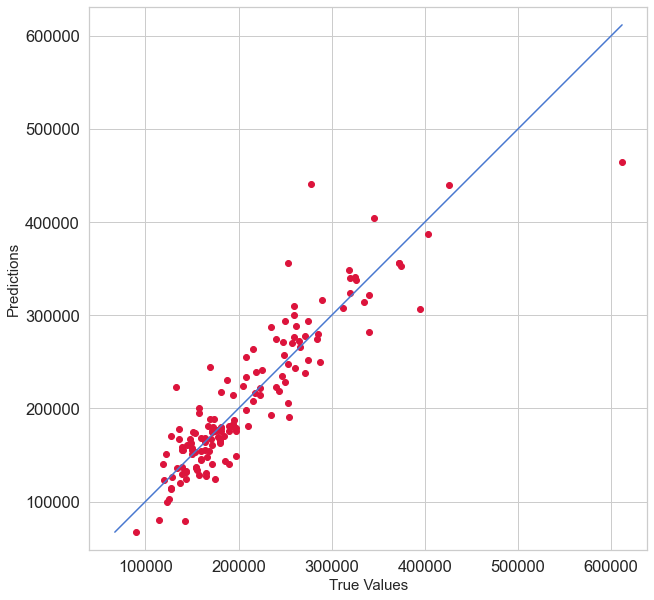

In [165]:
plt.figure(figsize=(10,10))
plt.scatter(y_test, y_pred, c='crimson')

p1 = max(max(y_pred), max(y_test))
p2 = min(min(y_pred), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

In [166]:
def mape(actual,pred):
    return np. abs((actual - pred) / actual) * 100
result['Mape']=np.abs((result['y_test']-result['y_pred']) / result['y_test'])*100
result

,y_test,y_pred,Mape
0,175000,124627.840976,28.784091
1,177500,169527.622202,4.491480
2,260000,276105.904953,6.194579
3,611657,464429.911999,24.070204
4,120000,123015.133874,2.512612
...,...,...,...
142,253000,205326.448347,18.843301
143,185000,144049.936805,22.135169
144,168500,154668.863701,8.208389
145,250000,228554.160442,8.578336


In [167]:
mape=result['Mape'].mean()
mape

11.768217495925224

In [168]:
accuracy=100-mape
accuracy

88.23178250407477